**Name- Vinayak Bhat**

**Subgroup - 3Q11**

**Roll No. - 102317293**

1)The Iris dataset is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width). Use SVC from sklearn.svm on the Iris dataset and follow the steps below:

a)	Load the dataset and perform train–test split (80:20).

b)	Train three different SVM models using the following kernels:
Linear, Polynomial (degree=3), RBF

c)	Evaluate each model using:
•	Accuracy
•	Precision
•	Recall
•	F1-Score

d)	Display the confusion matrix for each kernel.

e)	Identify which kernel performs the best and why.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
X=iris.data
y=iris.target
X.shape

(150, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

linear kernel

For Linear Kernel:

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0
confusion matrix: 



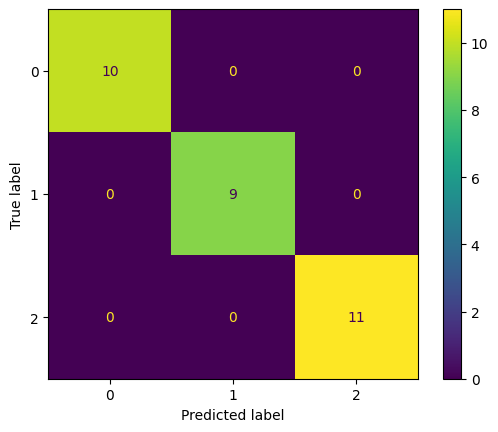

In [ ]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred_linear=svm_linear.predict(X_test)

print('For Linear Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred_linear))
print('precision: ',precision_score(y_test,y_pred_linear, average='macro'))
print('recall: ',recall_score(y_test,y_pred_linear, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred_linear, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linear))
disp.plot()
plt.show()

Polynomial Kernel(degree=3)


For Polynomial Kernel:

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0
confusion matrix: 



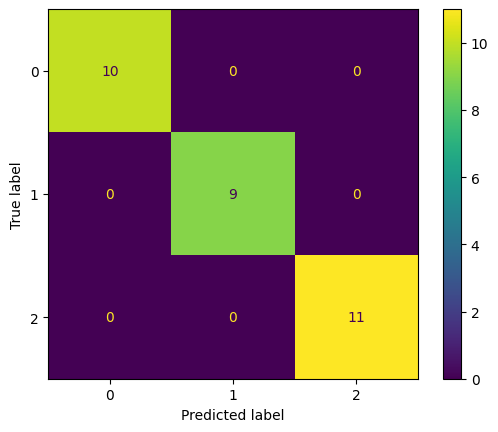

In [ ]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred_poly=svm_poly.predict(X_test)

print('For Polynomial Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred_poly))
print('precision: ',precision_score(y_test,y_pred_poly, average='macro'))
print('recall: ',recall_score(y_test,y_pred_poly, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred_poly, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_poly))
disp.plot()
plt.show()

RBF

For RBF Kernel:

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0
confusion matrix: 



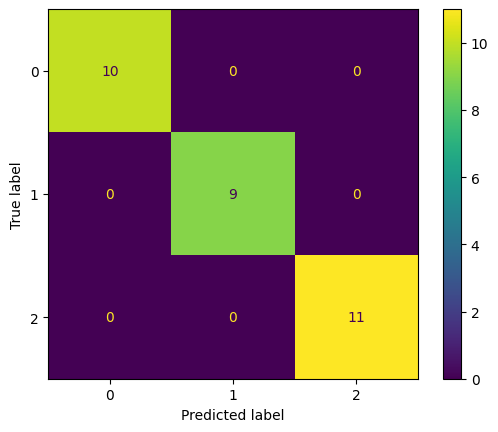

In [ ]:
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)

print('For RBF Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred_rbf))
print('precision: ',precision_score(y_test,y_pred_rbf, average='macro'))
print('recall: ',recall_score(y_test,y_pred_rbf, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred_rbf, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf))
disp.plot()
plt.show()

All three kernels (Linear, Polynomial, RBF) achieved identical performance with 100% accuracy, precision, recall, and F1-score on the test set. This is because the Iris dataset is small, clean, balanced, and almost linearly separable.

Since the metrics are the same, the preferred model is the Linear SVM, as it is the simplest model and avoids unnecessary complexity.

In [ ]:
model = SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
def predict_flower(sepal_length, sepal_width, petal_length, petal_width):
    df = pd.DataFrame.from_dict({'Sepal Length':[sepal_length],
                                  'Sepal Width': [sepal_width],
                                 'Petal Length': [petal_length],
                                  'Petal Width': [petal_width]
    })
    predict = model.predict_proba(df)[0]
    return {model.classes_[i]: predict[i] for i in range(3)}
# Importing gradio
import gradio as gr
# Creating Web App
sepal_length = gr.Slider(minimum=0, maximum=10, value=5, label="sepal_length")
sepal_width = gr.Slider(minimum=0, maximum=10, value=5, label="sepal_width")
petal_length = gr.Slider(minimum=0, maximum=10, value=5, label="petal_length")
petal_width = gr.Slider(minimum=0, maximum=10, value=5, label="petal_width")
gr.Interface(predict_flower, [sepal_length, sepal_width, petal_length, petal_width], "label", live=True).launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a3851a34d4dfa874e0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9bbc4842a7b9b54131.gradio.live
Killing tunnel 127.0.0.1:7860 <> https://a3851a34d4dfa874e0.gradio.live


2) SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.

A) Use the Breast Cancer dataset from sklearn.datasets.load_breast_cancer.

B) Train an SVM (RBF kernel) model with and without feature scaling (StandardScaler). Compare both results using:

•	Training accuracy

•	Testing accuracy

C) Discuss the effect of feature scaling on SVM performance.


In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

without feature scaling:

For RBF Kernel:

accuracy:  0.9473684210526315
precision:  0.961038961038961
recall:  0.9302325581395349
f1 score:  0.9422297297297297
confusion matrix: 



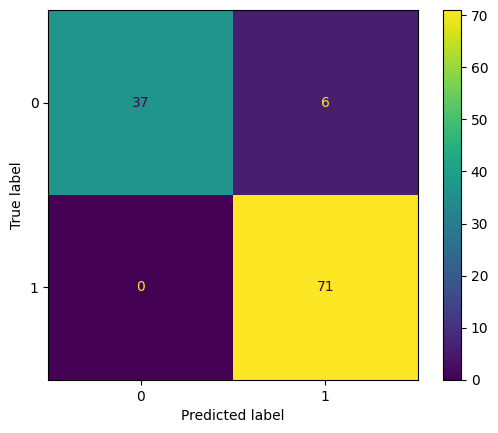

In [ ]:
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)

print('For RBF Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred_rbf))
print('precision: ',precision_score(y_test,y_pred_rbf, average='macro'))
print('recall: ',recall_score(y_test,y_pred_rbf, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred_rbf, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf))
disp.plot()
plt.show()

with scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

For RBF Kernel:

accuracy:  0.9824561403508771
precision:  0.9863013698630136
recall:  0.9767441860465116
f1 score:  0.9811507936507937
confusion matrix: 



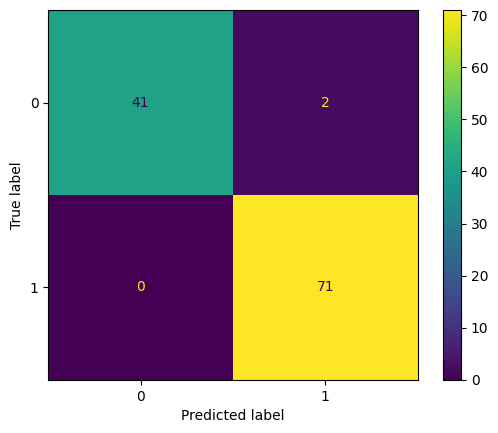

In [ ]:
svm=SVC(kernel='rbf')
svm.fit(X_train_scaled,y_train)
y_pred=svm.predict(X_test_scaled)

print('For RBF Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred, average='macro'))
print('recall: ',recall_score(y_test,y_pred, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

Without scaling, features with larger numeric ranges dominate the distance calculations, causing the model to form a distorted decision boundary and leading to poor generalization on the test set. After applying StandardScaler, all features are brought to the same scale, allowing the SVM to compute balanced distances and learn a cleaner separating hyperplane. As a result, the model's testing accuracy improves substantially